In [122]:
%cd /Users/Brett/Code/bricolage-dev/
from bricolage import lineage, threshold3, graph, analysis
from bricolage.analysis_ext import CausalFlowAnalyzer, Information, MutualInfoAnalyzer
from bricolage.neighbourhood import NeighbourhoodSample

/Users/brett/Dropbox/Code/bricolage-dev


In [123]:
%matplotlib inline
import pandas as pd
import seaborn as sb
import numpy as np
import bisect
from IPython.display import Image

In [124]:
from experiments.hierarchy1 import the_exp

In [125]:
rep = the_exp.treatments[1].replicates[2]
lin = rep.get_lineage()

In [126]:
n = lin.population.get_best()[0]
anc = lin.get_ancestry(n.identifier)
gens = [n.generation for n in anc]
targ = lin.targets[0]

In [127]:
cf = CausalFlowAnalyzer(lin.world, [1, 0, 1])

In [128]:
df = pd.DataFrame(cf.numpy_info_from_collection(anc).sum(axis=2))
df.tail()

,0,1,2,3,4,5
717,0,3,0.10764,0,0,0
718,0,3,0.10764,0,0,0
719,0,3,0.10764,0,0,0
720,0,3,0.10764,0,0,0
721,0,3,0.10764,0,0,0


In [129]:
df.set_index(np.array(gens), inplace=True)

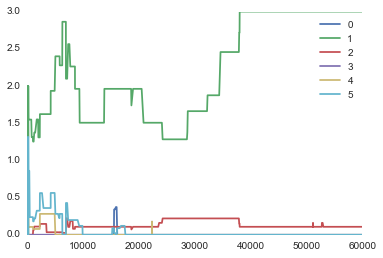

In [130]:
df.plot()

In [131]:
ns = anc.network_at_generation(60000)
nay = NeighbourhoodSample(ns, 50000, .1)

In [132]:
naydf = pd.DataFrame(cf.numpy_info_from_collection(nay.neighbours).sum(axis=2))

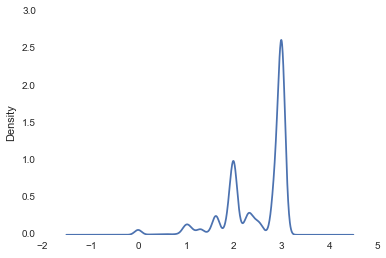

In [133]:
naydf.max(axis=1).plot(kind='kde')

In [134]:
targ.assess_collection(nay.neighbours)

In [135]:
fits = pd.DataFrame([n.fitness for n in nay.neighbours])

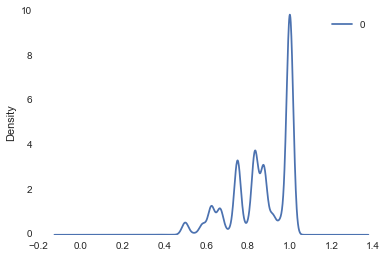

In [137]:
fits.plot(kind='kde')

In [19]:
def show_network(n, s=True):
    print n.fitness
    graph.save_network_as_fullgraph(n, name='test', simplify=s)
    return Image(filename='network-test.png', width=400) 

In [21]:
show_network(anc[-1])

OverflowError: can't convert negative value to size_t

1.0
saving test


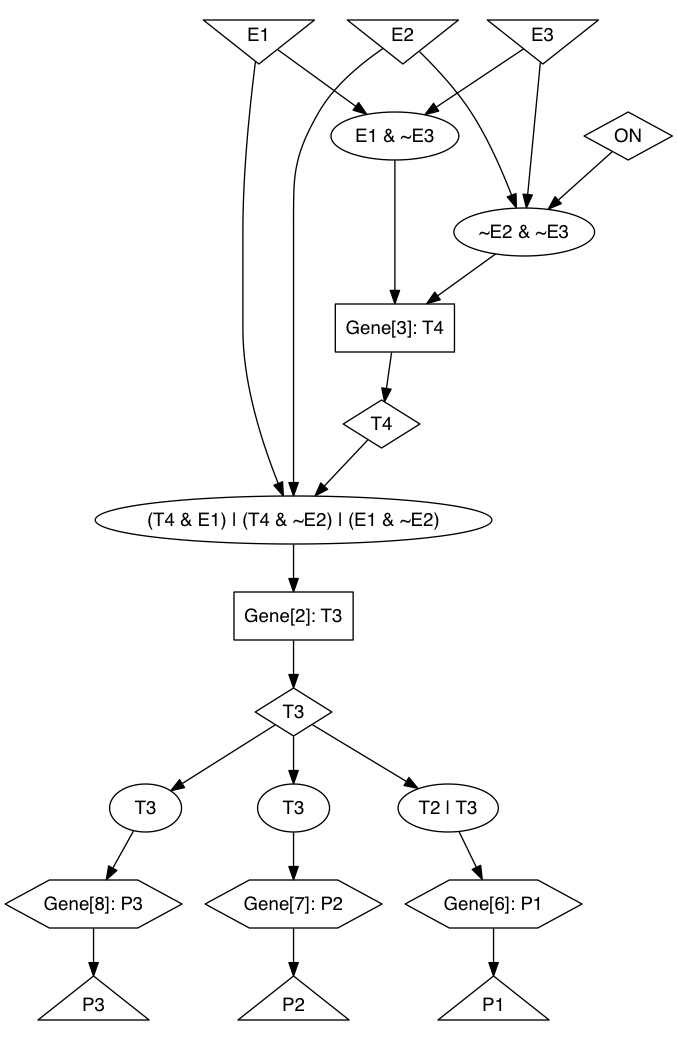

In [53]:
show_network(anc[515])